In [43]:
import pandas as pd
import test
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split

# 데이터 불러오기
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# 데이터 확인
train_shape = train_df.shape
test_shape = test_df.shape

train_df.info()
print(train_shape)


test_df.info()
print(test_shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

train = 1460개의 항목, 81개의 컬럼  
test = 1459개의 항목, 80개의 칼럼  

In [2]:
# 변수별 결측치 확인 후, 적절한 방법(평균/최빈값/“없음” 처리 등) 선택
# 결측치 확인
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# 결과 출력
train_shape, test_shape, missing_values

((1460, 81),
 (1459, 80),
 PoolQC          1453
 MiscFeature     1406
 Alley           1369
 Fence           1179
 MasVnrType       872
 FireplaceQu      690
 LotFrontage      259
 GarageType        81
 GarageYrBlt       81
 GarageFinish      81
 GarageQual        81
 GarageCond        81
 BsmtExposure      38
 BsmtFinType2      38
 BsmtQual          37
 BsmtCond          37
 BsmtFinType1      37
 MasVnrArea         8
 Electrical         1
 dtype: int64)

데이터 결측치 처리 참고 : https://zhining.tistory.com/27  
 PoolQC          1453  
 MiscFeature     1406  
 Alley           1369  
 Fence           1179  
 MasVnrType       872  
해당 데이터들의 결측치가 50% 이상이라서 drop으로 제거한다.  

In [44]:
# 변수별 결측치 확인 후, 적절한 방법(평균/최빈값/“없음” 처리 등) 선택
train_df.drop(columns=["PoolQC", "MiscFeature", "Alley", "Fence"], axis=1, errors="ignore", inplace=True)
test_df.drop(columns=["PoolQC", "MiscFeature", "Alley", "Fence"], axis=1, errors="ignore", inplace=True)

print(train_df.columns)
print(test_df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

결측치 제거 참고 : https://cheris8.github.io/data%20analysis/DP-NA-Imputation/  
  
train과 test 데이터에서 결측치가 50% 이상 넘는 컬럼을 삭제하고 나머지 값들로 진행.  
  
- PoolQC : 수영장 품질 (거의 결측)  
- MiscFeature : 특이한 추가 시설 (거의 없음)  
- Alley : 뒷골목 여부 (대부분 결측)  
- Fence : 울타리 정보 (많은 데이터가 없음)  
  
axis = 1 : 열(컬럼)을 삭제하겠다는 의미 (행 삭제는 axis=0)  
errors = "ignore" : 삭제할려는 컬럼이 없어도 에러를 발생시키지 않음  
inplace = True : 원본 데이터프레임(train_df)을 직접 수정  

변수 처리 참고 : https://dining-developer.tistory.com/20  

In [45]:
# 범주형 변수(예: Neighborhood, GarageType 등)는 One-Hot Encoding(또는 Label Encoding)
# 1. 범주형 변수 결측치 처리 ("None"으로 대체)
categorical_cols = ["GarageType", "GarageFinish", "GarageQual", "GarageCond", 
                    "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
                    "MasVnrType"]

for col in categorical_cols:
    train_df[col] = train_df[col].fillna("None")
    test_df[col] = test_df[col].fillna("None")

# 2. 수치형 변수 결측치 처리 (중앙값으로 대체)
numerical_cols = ["LotFrontage", "GarageYrBlt", "MasVnrArea"]

for col in numerical_cols:
    median_value = train_df[col].median()
    train_df[col] = train_df[col].fillna(median_value)
    test_df[col] = test_df[col].fillna(median_value)

# 🚀 추가 개선: 차고가 없는 경우 GarageYrBlt = 0으로 설정
train_df.loc[train_df["GarageType"] == "None", "GarageYrBlt"] = 0
test_df.loc[test_df["GarageType"] == "None", "GarageYrBlt"] = 0

# 3. Electrical [1개만 결측] -> 최빈값으로 대체
train_df["Electrical"] = train_df["Electrical"].fillna(train_df["Electrical"].mode()[0])

# 4. 결측치 개수 확인
missing_values_after = train_df.isnull().sum().sum()
print("✅ 최종 결측치 개수:", missing_values_after)

✅ 최종 결측치 개수: 690


In [47]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 🎯 1. 피처 & 타겟 변수 분리
X = train_df.drop(columns=["Id", "SalePrice"])  # 독립 변수
y = train_df["SalePrice"]  # 종속 변수

# 🎯 2. 범주형, 수치형 변수 분리
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(exclude=["object"]).columns

# 🎯 3. 훈련 데이터 & 검증 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 🎯 4. ColumnTransformer를 사용하여 범주형 변수 인코딩 & 수치형 변수 표준화
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),  # 수치형 변수 표준화
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)  # 범주형 변수 원-핫 인코딩
])

categorical_cols 리스트에 결측치를 처리할 범주형 변수(문자형 변수) 목록을 저장 (데이터 타입이 object인 컬럼들)  
for 반복문으로 모든 컬럼의 결측치를 처리함.  
결측값을 None으로 채움 (의미 있는 값으로 변경)  
  
numrical_cols 리스트에 수치형 변수 중 결측치를 처리할 컬럼을 저장  
.median() -> 중앙값(median)을 구해서 결측치를 대체  
.fillne(median_value) -> 결측치를 중앙값(극단값이 있어도 대표값을 잘 나타내기때문)으로 채움  
  
참고 : https://m.blog.naver.com/upennsolution/221713078940  
참고 : https://jamm-notnull.tistory.com/12  


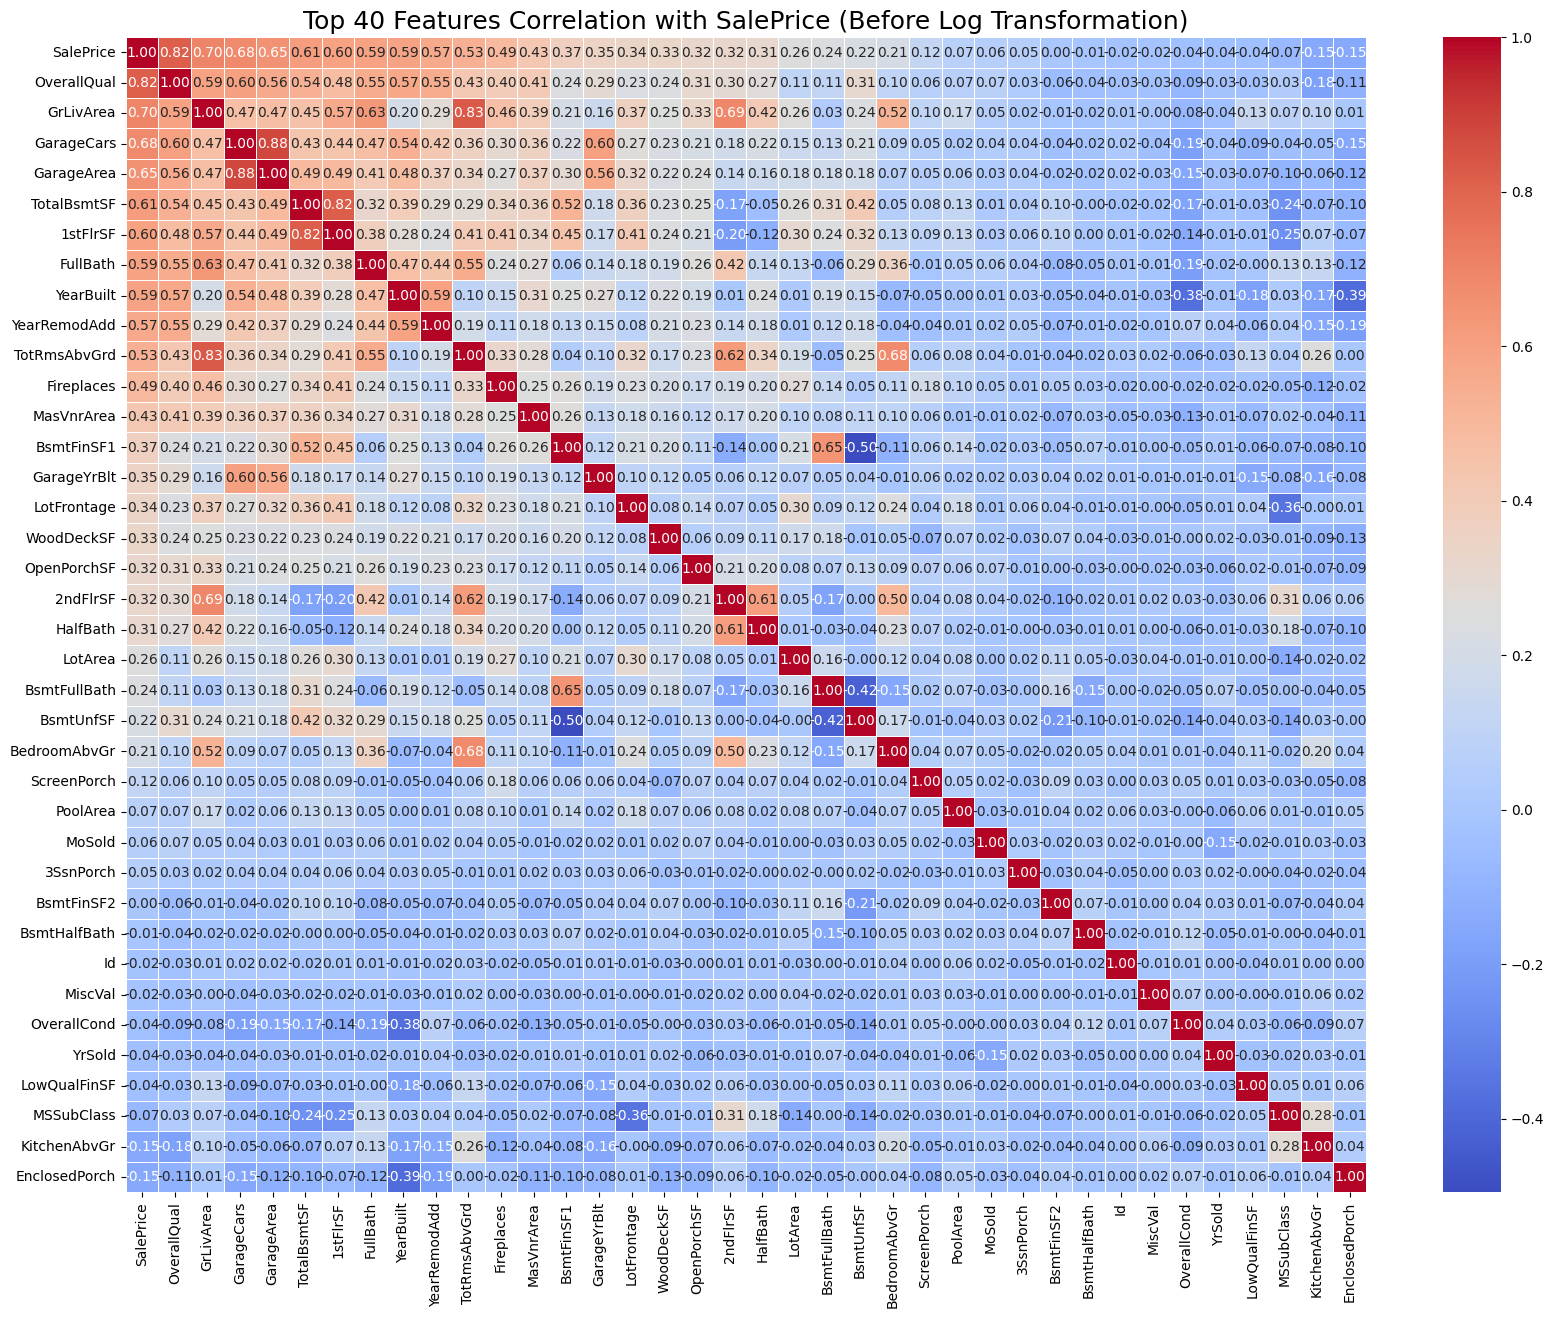

In [20]:
# 변수간 상관관계 확인
import seaborn as sns

# corr=train_df.corr()
# top_corr = train_df[corr.nlargest(40, 'SalePrice')['SalePrice'].index].corr()
# figure, ax1 = plt.subplots(nrows=1, ncols=1)
# figure.set_size_inches(20,15)
# sns.heatmap(top_corr, annot=True, ax=ax1)

# 숫자형 변수만 선택하여 상관계수 계산 (로그 변환 전)
corr_before = train_df.select_dtypes(include=['number']).corr()

# SalePrice와 가장 상관관계가 높은 상위 40개 변수 선택
top_corr_features_before = corr_before.nlargest(40, 'SalePrice')['SalePrice'].index

# 선택한 변수들의 상관관계 행렬 생성
top_corr_before = train_df[top_corr_features_before].corr()

# 시각화 설정
plt.figure(figsize=(20, 15))
sns.heatmap(top_corr_before, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# 제목 추가
plt.title("Top 40 Features Correlation with SalePrice (Before Log Transformation)", fontsize=18)
plt.show()

목표변수 : SalePrice  
  
** 긍정적인 영향  
OverallQual (종합 품질)  
GrLivArea (거실 평방 피트)  
GarageCarS (차고의 차량 수용 가능)  
GarageArea (차고 크기)  
TotalBsmtSF (지하실 면적의 총 제곱 피트)  
1stFlrSF (1층 평방 피트)  
FullBath (지상 위에 있는 완전한 욕실)  
TotRmsAbvGrd (지상 위의 총 객실 수(욕실은 포함하지 않음))  
YearBuilt (건설 날짜)  
YearRemodAdd (리모델링 날짜)  
  
** 부정적 영향  
KitchenAbvGr (주방 수와 품질)  
EnclosedPorch (평방 피트의 닫힌 베란다 영역)  
MSSubClass (건물 클래스)  
OverallCond (전체 상태 등급)  
YrSold (판매 연도)  
  
이것 외
BsmtUnfSF (지하실의 미완성 평방 피트) x BsmtFinSF1 (1종 제곱피트 완성) 이 서로 음의 상관관계
명칭 참고 : https://wiki.datrics.ai/house-prices  


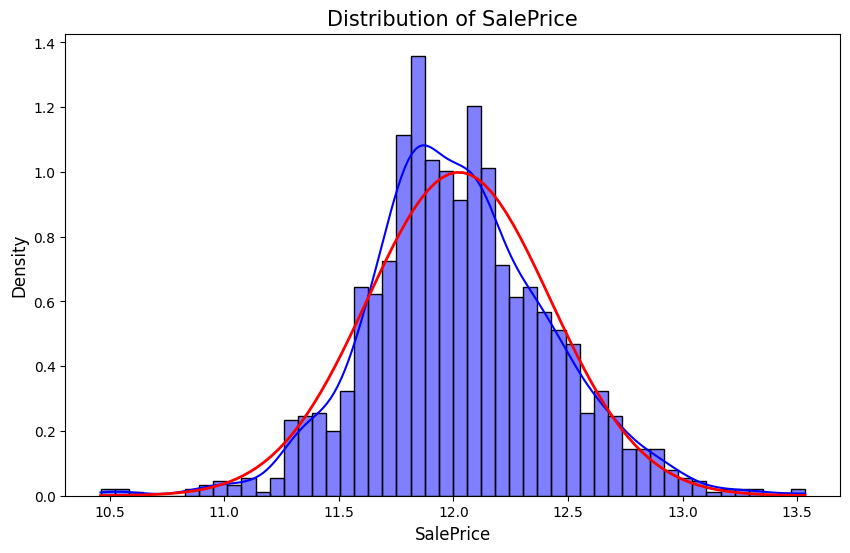

In [21]:
# - **타겟값**(SalePrice) 분포 확인: 로그 변환을 고려(왜도가 클 때)
from scipy.stats import norm, skew

# SalePrice의 분포 확인
plt.figure(figsize=(10, 6))     # 그래프 크기를 가로 10, 세로 6으로 설정
sns.histplot(train_df['SalePrice'], kde=True, bins=50, stat="density", color="blue")

# 정규분포 곡선 추가
mu, sigma = norm.fit(train_df['SalePrice'])
x = np.linspace(min(train_df['SalePrice']), max(train_df['SalePrice']), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r', linewidth=2)  # 정규분포 곡선

plt.title("Distribution of SalePrice", fontsize=15)
plt.xlabel("SalePrice", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

sns.distplot()은 최신 Seaborn에서 sns.histplot()으로 대체됨  
  
scipy.stats.norm → 정규분포 곡선 추가  
scipy.stats.skew → 왜도(Skewness) 계산  
numpy → 로그 변환 시 사용 (np.log1p())  
  
kde=True : 커널 밀도 추정(KDE) 곡선 추가  (부드러운 곡선으로 데이터의 밀도를 표현)  
bins=50 : 히스토그램 구간을 50개로 설정  
stat="density" : 밀도 값을 기준으로 정규화  
color="blue" : 그래프 색상을 파란색으로 설정  
  
분포가 왼쪽으로 치우쳐져 있음. -> 왜도(Skewness)값이 1보다 크면 로그 변환을 고려  
왜도가 크면 정규분포에서 많이 벗어남  
머신러닝 모델은 정규분포에 가까울 수록 성능이 더 좋을 수 있음.  
  
참고 : https://wndofla123.tistory.com/83  

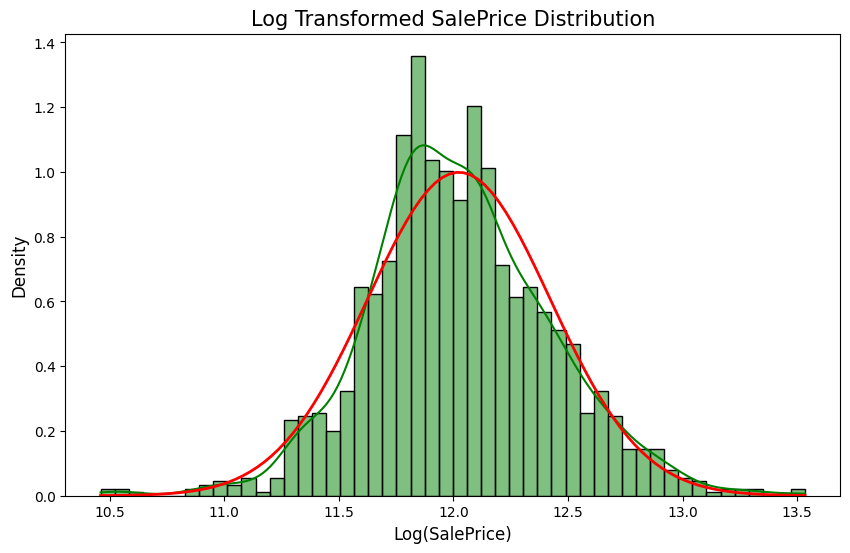

In [22]:
corr_after = train_df.select_dtypes(include=['number']).corr()

# 로그 변환 후 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True, bins=50, stat="density", color="green")

# 정규분포 곡선 추가
mu, sigma = norm.fit(train_df['SalePrice'])
x = np.linspace(min(train_df['SalePrice']), max(train_df['SalePrice']), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r', linewidth=2)

plt.title("Log Transformed SalePrice Distribution", fontsize=15)
plt.xlabel("Log(SalePrice)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

norm.fit() -> SalePrice 데이터의 평규(mu)과 표준편차(sigma)를 계산  
np.linspace() -> SalePrice의 최소값~최대값을 100개 구간으로 나눈 배열 생성  
norm.pdf(x, mu, sigma) ->  정규분포 활률밀도함수(PDF) 계산  
plt.plot() -> 그래프에 정규분포 곡선 추가  
'r' -> 곡선을 빨간색으로 표시  
linewidth=2 -> 선 두께 설정  
plt.xlabel("SalePrice", fontsize=12) -> X축 라벨 설정  
plt.ylabel("Density", fontsize=12) -> Y축 라벨 설정  
  
로그 변환을 하면 큰 값이 줄어들고 분포가 정규분포에 가까워짐.  
SalePrice는 극단적으로 큰 값이 많아 오른쪽으로 치우친 분포를 가짐.  
로그 변환을 하면 왜도가 줄어들고 데이터가 정규 분포에 가가워짐.  
이렇게 하면 모델 학습이 더 잘되고, 예측 성능이 올라감.  
  
log1p 참고 : https://go-for-data.tistory.com/entry/05-Regression-Log-Transformation#google_vignette  

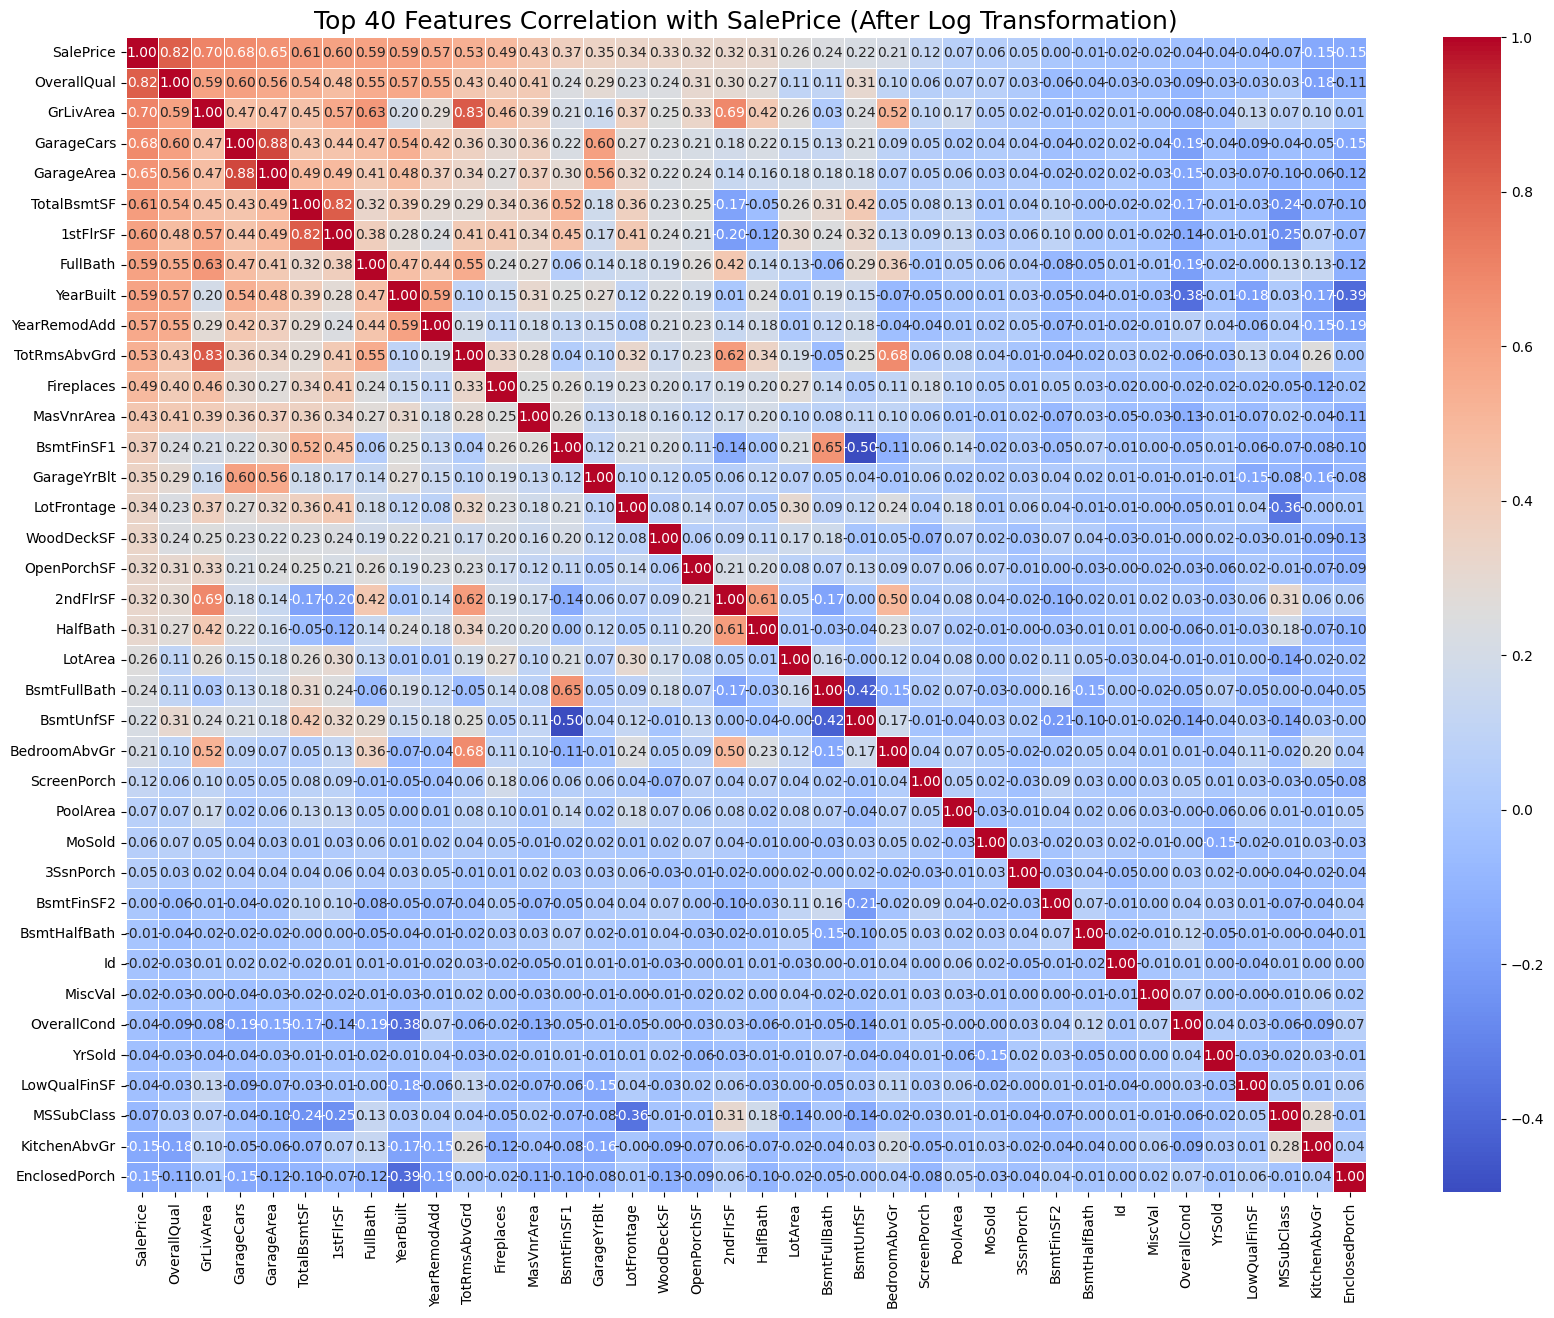

In [23]:
# 변수 간 상관계수 확인, 다중공선성(VIF) 여부 검토

import scipy.stats as stats

# 숫자형 변수만 선택하여 상관계수 재계산 (로그 변환 후)
corr_after = train_df.select_dtypes(include=['number']).corr()

# SalePrice와 가장 상관관계가 높은 상위 40개 변수 선택
top_corr_features_after = corr_after.nlargest(40, 'SalePrice')['SalePrice'].index

# 선택한 변수들의 상관관계 행렬 생성
top_corr_after = train_df[top_corr_features_after].corr()

# 시각화 설정
plt.figure(figsize=(20, 15))
sns.heatmap(top_corr_after, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# 제목 추가
plt.title("Top 40 Features Correlation with SalePrice (After Log Transformation)", fontsize=18)
plt.show()

로그 변환 전 히트맵과 로그 변환 후 히트맵의 차이가 없는것을 보아  
로그 변환은 상관계수에 영향을 주지 않는거 같음.




In [24]:
# 데이터의 왜도(Skewness) 확인
numeric_feats = train_df.select_dtypes(include=['number']).columns
skewed_feats = train_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

print("왜도가 높은 변수 (상위 10개):\n", skewed_feats.head(10))

왜도가 높은 변수 (상위 10개):
 MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
dtype: float64


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# # 다중공선성 확인을 위해 SalePrice를 제외한 숫자형 변수 선택
# features = train_df.select_dtypes(include=['number']).drop(columns=['Id', 'SalePrice'])

# # VIF 계산
# vif_data = pd.DataFrame()
# vif_data["Feature"] = features.columns
# vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# # VIF 결과 출력
# print(vif_data.sort_values(by="VIF", ascending=False).head(10))

일부 변수의 VIF 값이 int(무한대)로 나옴.  
  
원인 1 :  
TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF   
즉, TotalBsmtSF는 나머지 세 변수의 합으로 이루어져 있음.  
이처럼 한 변수가 다른 변수들의 선형 조합이면 VIF가 무한대가 됨  
  
원인 2 :  
GarageYrBlt, YrSold 등은 특정 값이 많아서 회귀 분석에서 다중공선성이 발생할 가능성이 큼.  
  
해결방법 :  
GaraeYrBlt를 현재 연도(YrSold)와의 차이 값으로 변환하고  
GarageAge = YrSold - GarageYrBlt 형태로 새로운 변수를 생성해보자.  

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. `BasementRatio` 제거 가능 (QualityPerArea 유지)
drop_cols = ["BasementRatio"]

# 2. 불필요한 변수 삭제
train_df.drop(columns=drop_cols, inplace=True, errors="ignore")
test_df.drop(columns=drop_cols, inplace=True, errors="ignore")

# 3. 다중공선성 해결 후 VIF 재계산
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = train_df.select_dtypes(include=['number']).drop(columns=['Id', 'SalePrice'])

vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# 결과 출력
print("✅ 최종 다중공선성 해결 후 VIF 값:")
print(vif_data.sort_values(by="VIF", ascending=False).head(10))

✅ 최종 다중공선성 해결 후 VIF 값:
           Feature        VIF
7       GarageCars  10.554686
19  QualityPerArea   9.377385
15          MoSold   6.096863
18     BuildingAge   4.746207
17        RemodAge   3.554549
0       MSSubClass   2.916681
6       Fireplaces   2.487541
1          LotArea   2.450305
3     BsmtFullBath   1.904658
5         HalfBath   1.904584


위에서 해결방법 :  
GaraeYrBlt를 현재 연도(YrSold)와의 차이 값으로 변환하고  
GarageAge = YrSold - GarageYrBlt 형태로 새로운 변수를 생성해보자.  
를 해봤더니 아주 엉망진창이되서 vif 코드를 총 네번은 더 수정한거 같음.  
  
1. BasementRatio(지하 면적 비율) 변수가 다른 변수와 높은 상관관계를 가지고 있어 제거  
2. train_df와 test_df에서 BasementRatio 변수를 제거  
3. errors="ignore" 옵션을 추가하여 해당 변수가 이미 삭제된 상태라면 오류 없이 무시됨  
4. select_dtypes(include=['number']) → 숫자형 변수만 선택  
5. drop(columns=['Id', 'SalePrice']) → ID와 타겟 변수(SalePrice)는 VIF 계산에서 제외  
6. variance_inflation_factor(features.values, i) → 각 변수의 VIF 값 계산  
7. features.columns → 변수명 저장

In [48]:
#LinearRegression, RandomForestRegressor, XGBoost 등 적용

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# 🎯 5. 모델 학습 및 평가 함수
def evaluate_model(model, X_train, y_train, X_valid, y_valid, model_name):
    """ 모델을 학습하고 RMSE, MAE 평가 """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)

    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    mae = mean_absolute_error(y_valid, y_pred)

    print(f"✅ {model_name} 성능:")
    print(f"   - RMSE: {rmse:.4f}")
    print(f"   - MAE: {mae:.4f}\n")

    return model

# 🎯 6. 모델 학습 및 평가
# Linear Regression (표준화 + 원-핫 인코딩 포함)
lr_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])
lr_model = evaluate_model(lr_model, X_train, y_train, X_valid, y_valid, "Linear Regression")

# RandomForest Regressor (표준화 필요 없음, 원-핫 인코딩만 적용)
rf_model = Pipeline([
    ("preprocessor", ColumnTransformer([("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)])),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])
rf_model = evaluate_model(rf_model, X_train, y_train, X_valid, y_valid, "Random Forest")

# XGBoost Regressor (표준화 필요 없음, 원-핫 인코딩만 적용)
xgb_model = Pipeline([
    ("preprocessor", ColumnTransformer([("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)])),
    ("model", xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42))
])
xgb_model = evaluate_model(xgb_model, X_train, y_train, X_valid, y_valid, "XGBoost")

✅ Linear Regression 성능:
   - RMSE: 29588.5842
   - MAE: 18584.6843

✅ Random Forest 성능:
   - RMSE: 40838.5675
   - MAE: 25934.3292

✅ XGBoost 성능:
   - RMSE: 41397.5149
   - MAE: 25854.1523



RMSE(Root Mean Squared Error) : 모델의 예측값과 실제값의 차이를 제곱하여 평균을 낸 후, 제곱근을 씌운 값 (큰 오차에 더 민감함)  
MAE(Mean Absolute Error) : 모델의 예측값과 실제값의 차이의절대값을 평균낸 값 (직관적으로 해석 가능)  
모델 학습 (fit()) 한 후 예측 (predict())을 수행하여 RMSE, MAE 출력

1. Linear Regressin (선형 회귀) 모델 학습 
Linear Regression은 변수의 크기(scale)에 영향을 받기 때문에 표준화(Standardization)가 필요함.
수치형 변수 -> StandardScaler() 적용
번수형 변수 -> OneHotEncoder() 적용
데이터 변환(preprocessor) 후 Linear Regressin 학습 및 평가

2. Random Forest (랜덤 포레스트 회귀) 모델 학습
RandomForest는 트리 기반 모델이므로 표준화(정규화)가 필요없음
범주형 변수 -> OneHotEncoder() 적용
수치형 변수는 그대로 사용
랜덤 포레스트 회귀 모델 (RandomForestRegressor) 학습 및 평가

4. XGBoost (Extreme Gradient Boosting : 앙상블의 부스팅 기법의 한 종류) 모델 학습
XGBoost도 트리 기반 모델이므로 표준화(정규화)가 필요 없음
범주형 변수 -> OneHotEncoder
n_estimators=100, learning_rate=0.05, max_depth=6 등의 하이퍼파라미터 설정

evaluate_model() 함수를 활용하여 RMSE, MAE 비교 가능
모든 모델을 Pipeline을 사용하여 데이터 변환 + 학습을 한번에 처리

XGBoost란 무엇인가요?  
XGBoost(eXtreme Gradient Boosting)는 경사하강법을 활용하는 지도 학습 부스팅 알고리즘인 그레이디언트 부스트 Decision Trees를 사용하는 분산형 오픈 소스 머신 러닝 라이브러리  
XGBoost 참고 : https://www.ibm.com/kr-ko/think/topics/xgboost  
회귀 모델 성능 평가 지표 참고 : https://white-joy.tistory.com/10  